# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [23]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [24]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
train_and_validation_images.shape

(60000, 28, 28)

In [26]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [27]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(28, 28)


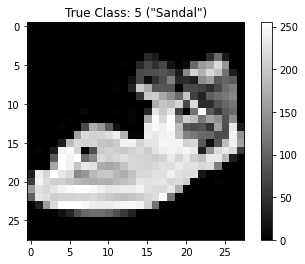

In [28]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
print(train_images[random_index].shape)
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

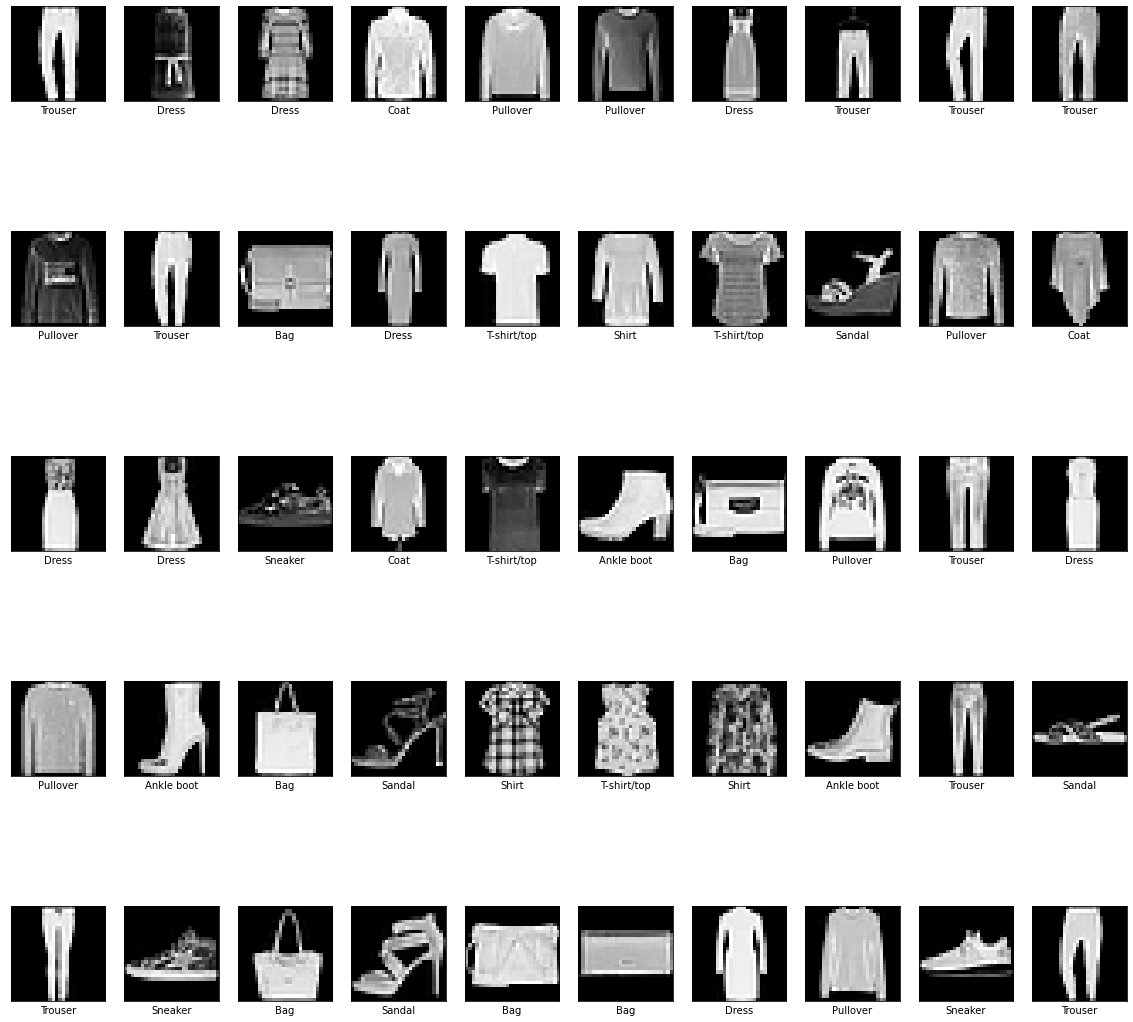

In [29]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [30]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0],784)
test_images_flatten = test_images.reshape(test_images.shape[0],784)

In [31]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255
test_images_model = test_images_flatten/255

In [32]:
# convert class vectors to binary class matrices
from keras.utils import np_utils
train_labels_categ = np_utils.to_categorical(train_labels, 10)
validation_labels_categ = np_utils.to_categorical(validation_labels, 10)
test_labels_categ = np_utils.to_categorical(test_labels, 10)
train_labels_categ.shape


(50000, 10)

# Train

In [33]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 
model=Sequential([
  Dense(256,input_dim=784,activation='relu'),
  Dropout(0.2),
  Dense(256,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes,activation='softmax')       
])

model.summary()


# End Code

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [34]:
#using rmsprop optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 [==============================] - 5s 11ms/step - loss: 0.5997 - accuracy: 0.7791 - val_loss: 0.4478 - val_accuracy: 0.8366
Epoch 2/40
391/391 [==============================] - 4s 10ms/step - loss: 0.4197 - accuracy: 0.8446 - val_loss: 0.3824 - val_accuracy: 0.8602
Epoch 3/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3750 - accuracy: 0.8638 - val_loss: 0.3828 - val_accuracy: 0.8653
Epoch 4/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3492 - accuracy: 0.8707 - val_loss: 0.3664 - val_accuracy: 0.8732
Epoch 5/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3320 - accuracy: 0.8767 - val_loss: 0.4960 - val_accuracy: 0.8389
Epoch 6/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3165 - accuracy: 0.8836 - val_loss: 0.3483 - val_accuracy: 0.8760
Epoch 7/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3037 - accuracy: 0.8873 - val_loss: 0.3397 - val_accuracy: 0.8801

# Test

In [35]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print(score)
print('Test accuracy:', score[1])
model.metrics_names
# You should be able to get,at least, 88% accuracy

[0.5053930878639221, 0.8899999856948853]
Test accuracy: 0.8899999856948853


['loss', 'accuracy']

In [51]:
test_logits = model.predict(test_images_flatten)
test_logits 

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
#test logits are expressed in arrays (one hot encoding)
#argmax Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_logits, axis=1)


In [53]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

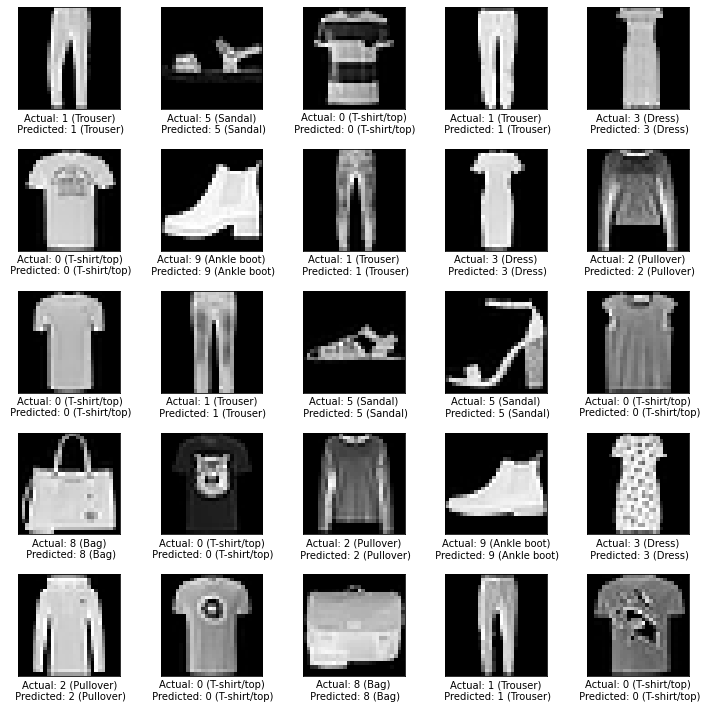

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()

No errors on this small sample!